<a href="https://colab.research.google.com/github/Koosell/Final_Project_BigData/blob/main/FP_BigData_PembangkitListrik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Memuat file CCPP.csv
df = pd.read_csv('CCPP.csv')

# Melihat informasi dasar dataset
print("===== Informasi Dataset Pembangkit Listrik =====")
df.info()

# Melihat 5 baris pertama
print("\n===== Contoh Data Pembangkit Listrik =====")
print(df.head())

===== Informasi Dataset Pembangkit Listrik =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB

===== Contoh Data Pembangkit Listrik =====
      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.27
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


===== Distribusi Setiap Fitur =====


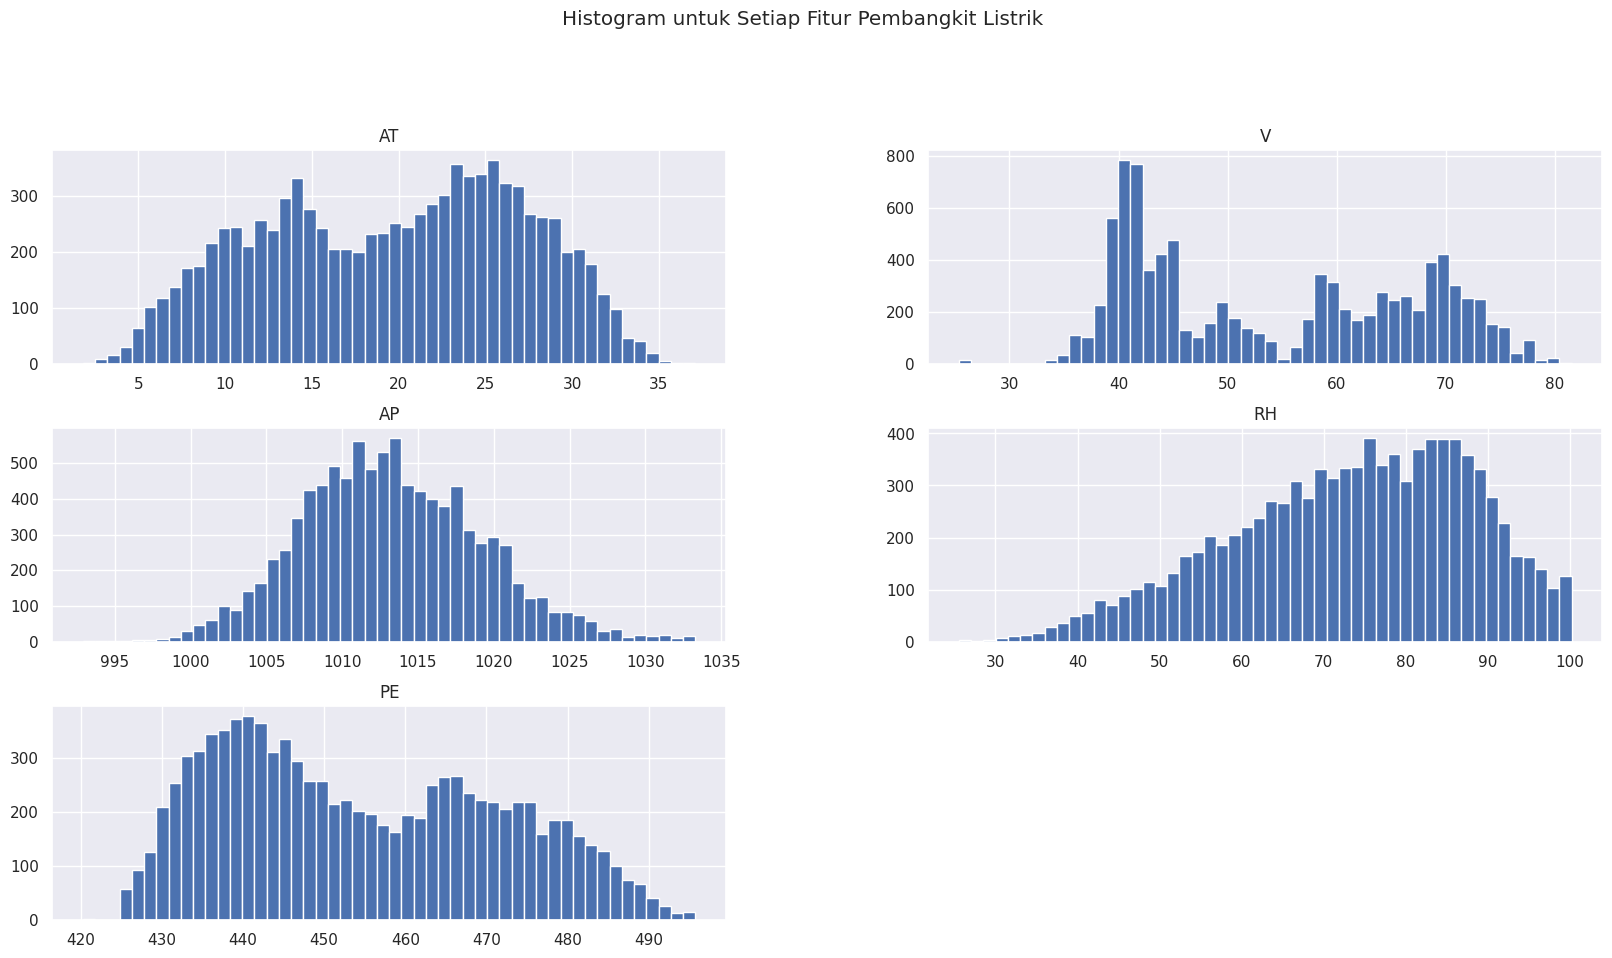

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur style visualisasi
sns.set(style="darkgrid")

# Membuat histogram untuk melihat distribusi dari setiap fitur
print("===== Distribusi Setiap Fitur =====")
df.hist(bins=50, figsize=(20,10))
plt.suptitle("Histogram untuk Setiap Fitur Pembangkit Listrik", y=1.02)
plt.show()

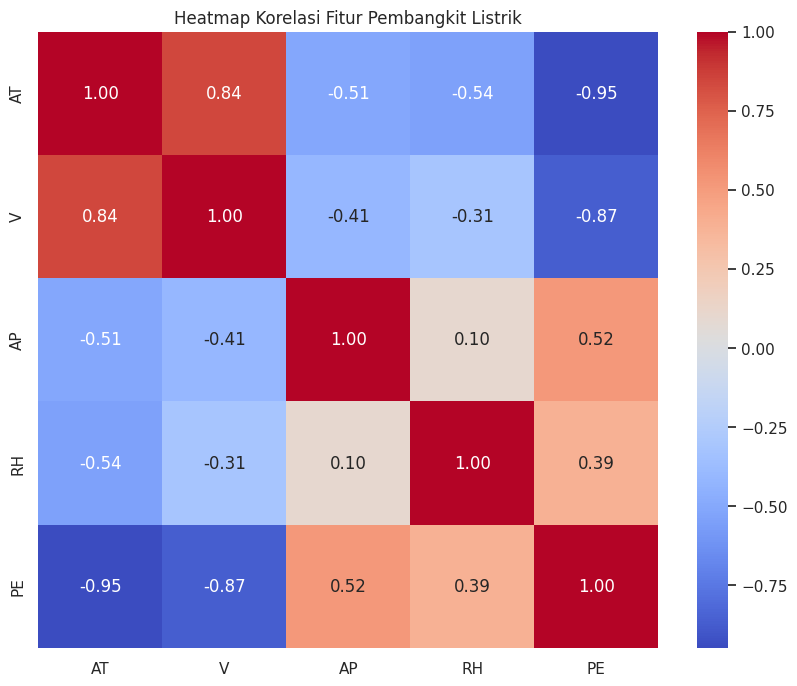

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Fitur Pembangkit Listrik')
plt.show()

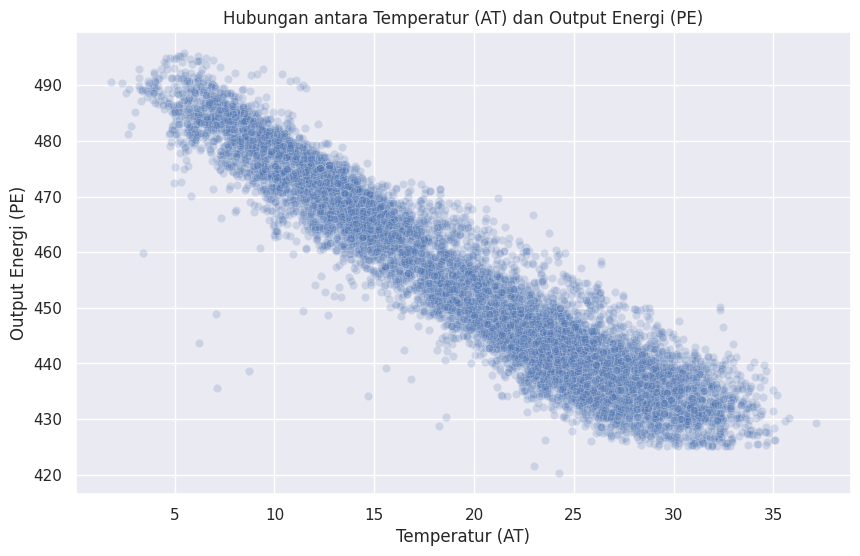

In [ ]:
# Membuat scatter plot untuk melihat hubungan antara Temperatur (AT) dan Output Energi (PE)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AT', y='PE', data=df, alpha=0.2) # alpha=0.2 untuk melihat kepadatan data

plt.title('Hubungan antara Temperatur (AT) dan Output Energi (PE)')
plt.xlabel('Temperatur (AT)')
plt.ylabel('Output Energi (PE)')
plt.show()

In [ ]:
# Mengimpor library yang dibutuhkan untuk membuat model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# --- Model 1: Regresi Linier Sederhana ---
print("===== MEMBANGUN MODEL REGRESI LINIER SEDERHANA =====")

# 1. Memisahkan Fitur (X) dan Target (y)
X_simple = df[['AT']] # Fitur: hanya Temperatur (AT)
y = df['PE']         # Target: Output Energi (PE)

# 2. Membagi Data menjadi Training Set (80%) dan Testing Set (20%)
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# 3. Membuat dan Melatih Model
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train)

# 4. Membuat Prediksi pada Data Testing
y_pred_simple = model_simple.predict(X_test_simple)

# 5. Mengevaluasi Kinerja Model
r2_simple = r2_score(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)

print(f"\nHasil untuk Regresi Linier Sederhana (Fitur: AT):")
print(f"R-squared (R²): {r2_simple:.4f}")
print(f"Mean Squared Error (MSE): {mse_simple:.2f}")

===== MEMBANGUN MODEL REGRESI LINIER SEDERHANA =====

Hasil untuk Regresi Linier Sederhana (Fitur: AT):
R-squared (R²): 0.9003
Mean Squared Error (MSE): 28.91


In [ ]:
# --- Model 2: Regresi Linier Berganda ---

print("\n" + "="*40) # Pemisah agar output rapi

# 1. Memisahkan Fitur (X) dan Target (y)
features = ['AT', 'V', 'AP', 'RH']
X_multi = df[features]
y = df['PE'] # Targetnya tetap sama

# 2. Membagi Data
X_train_multi, X_test_multi, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# 3. Membuat dan Melatih Model
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train)

# 4. Membuat Prediksi
y_pred_multi = model_multi.predict(X_test_multi)

# 5. Mengevaluasi Kinerja Model
r2_multi = r2_score(y_test, y_pred_multi)
mse_multi = mean_squared_error(y_test, y_pred_multi)

print("===== HASIL REGRESI LINIER BERGANDA =====")
print(f"Fitur yang digunakan: {features}")
print(f"R-squared (R²): {r2_multi:.4f}")
print(f"Mean Squared Error (MSE): {mse_multi:.2f}")


===== HASIL REGRESI LINIER BERGANDA =====
Fitur yang digunakan: ['AT', 'V', 'AP', 'RH']
R-squared (R²): 0.9301
Mean Squared Error (MSE): 20.27
